In [4]:
import random

import cv2
import numpy as np
import pandas as pd
import scipy
import torch
import torchvision
import tifffile
from PIL import Image
import LDCTIQAG2023_train as train_data
import json

import os.path as osp
import os

import analysis

In [5]:
from datasets import VornoiDataset, create_datalists


def load_images(data):
    image_np = list()
    for name, val in data.items():
        img = cv2.imread(f"../LDCTIQAG2023_train/image/{name}", cv2.IMREAD_UNCHANGED)
        image_np.append(img)
    return np.stack(image_np)

with open("../LDCTIQAG2023_train/train.json") as file:
    all_lables = pd.Series(json.load(file))

imgs_list, label_list = create_datalists(type="original")  # type mosaic

left_bound, right_bound = int(0.9 * len(imgs_list)), len(imgs_list)
all_images = load_images(all_lables)
train_dataset = VornoiDataset(np.concatenate((all_images[:left_bound], all_images[right_bound:])),
                              pd.concat([all_lables[:left_bound], all_lables[right_bound:]],
                                        ignore_index=True), parts=12)

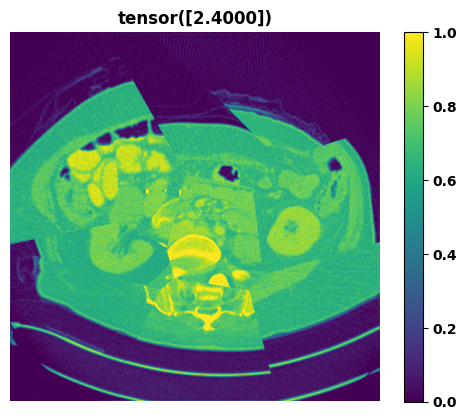

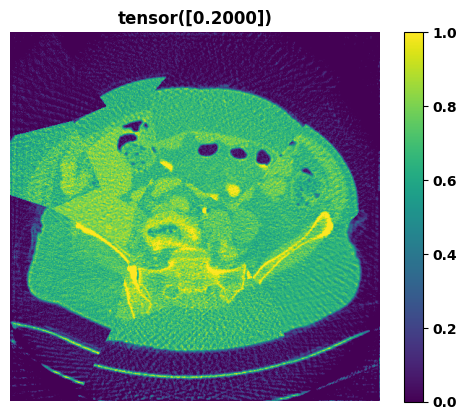

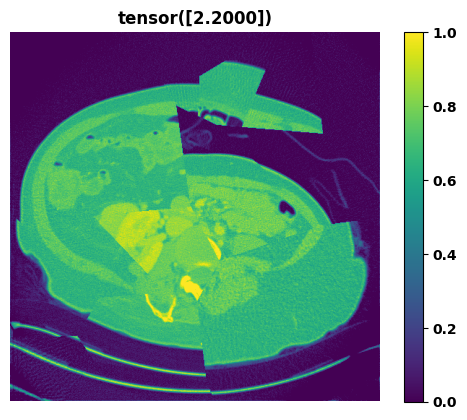

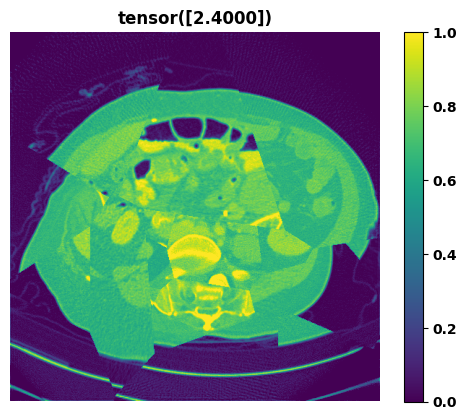

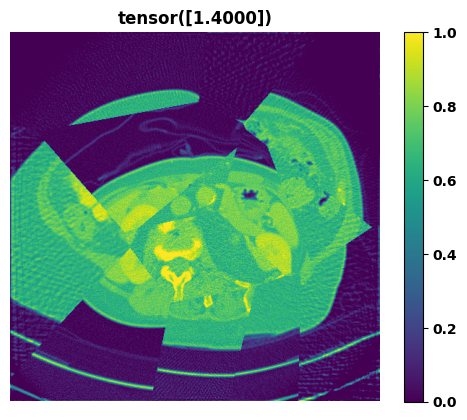

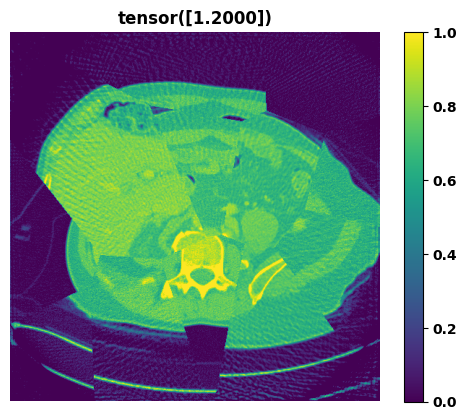

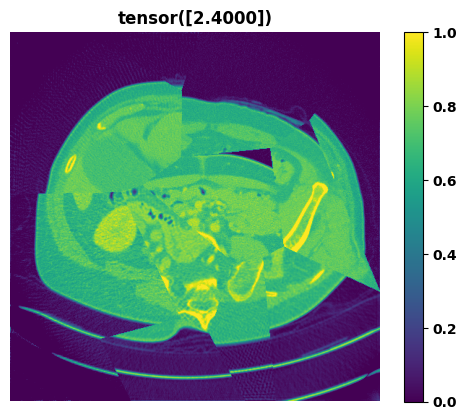

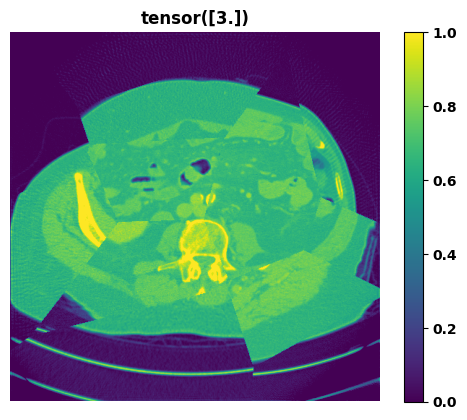

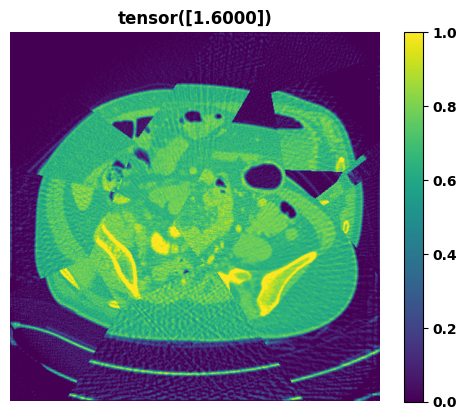

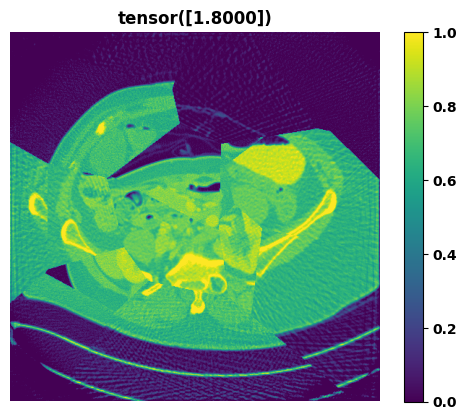

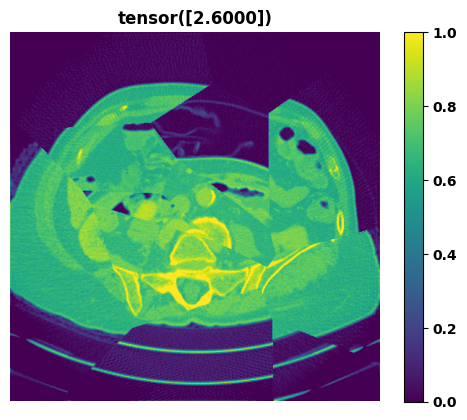

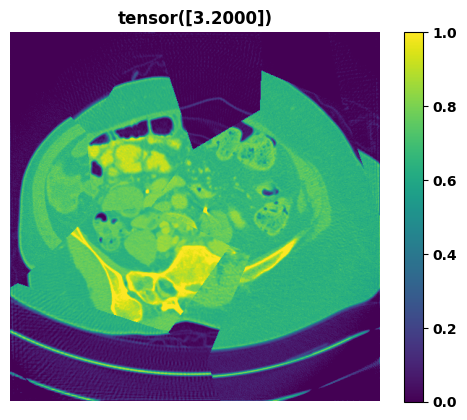

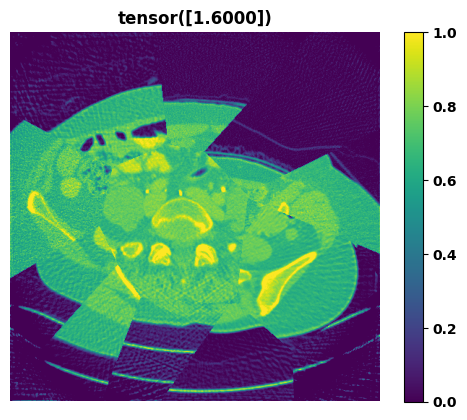

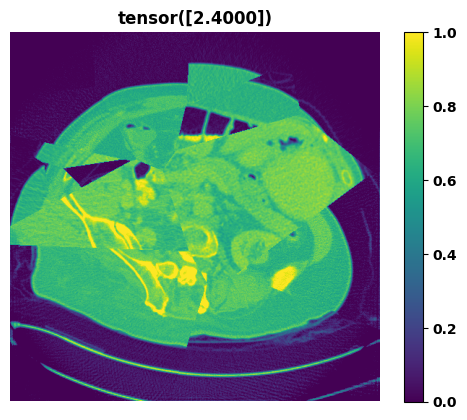

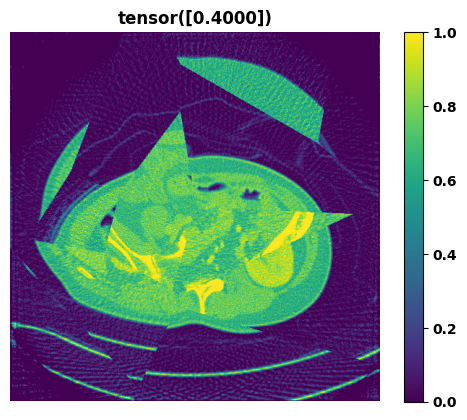

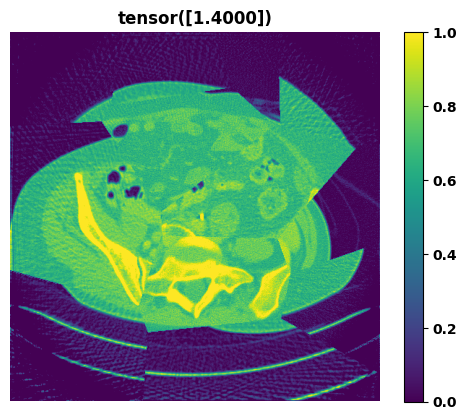

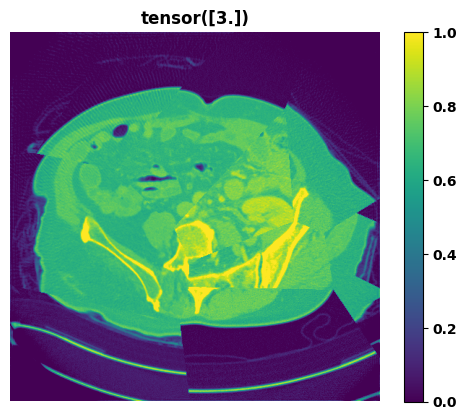

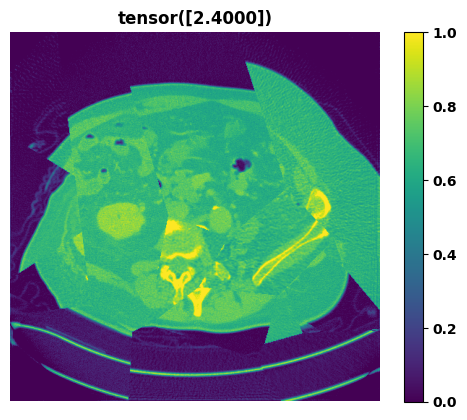

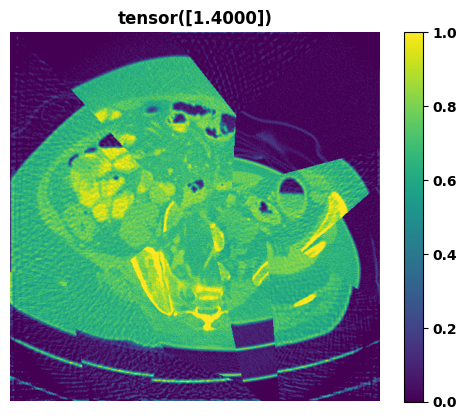

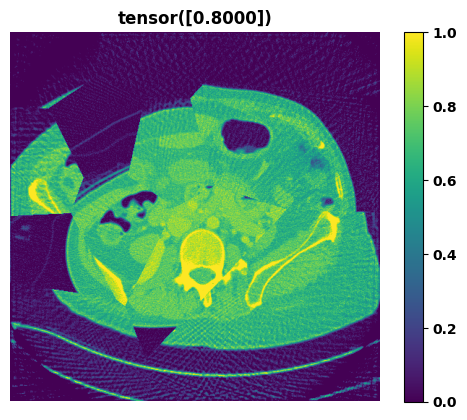

In [9]:
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)

for i in range(20):
    img, lab = next(iter(train_loader))
    img = img.reshape((512, 512))
    fig, ax = plt.subplots()  # Create a new figure and a new subplot
    img_display = ax.imshow(img)  # Display the image
    ax.set_title(lab)  # Set the title
    ax.axis('off')  # Turn off the axis

    # Create a colorbar for the Image, mappable is the Image we just plotted
    fig.colorbar(img_display, ax=ax)

    plt.show()  # Display the figure